# Reinforcement Learning

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if IS_COLAB or IS_KAGGLE:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents pyvirtualdisplay gym[box2d]
    !pip install -q -U atari_py==0.2.5

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No GPU was detected. CNNs can be very slow without a GPU.


## Introduction

### Recent stories

* DeepMind demonstrated a system that could learn to play just about any Atari game **from scratch, ventually outperforming humans.**

* Using only raw pixels as inputs and **without any prior knowledge of the rules of the games**

* RL is boiling with new ideas, with a wide range of applications


### Topics of today

* Apply the power of Deep Learning to the field of Reinforcement Learning

* what Reinforcement Learning is

* Deep Reinforcement Learning: **policy gradients and deep Q networks (DQNs)**, including a discussion of **Markov decision processes (MDPs)**.

* Q-Learning, Approximate Q-Learning, and Deep Q-Learning


## What is reinforcement learning?

* Reinforcement learning (RL) is an area of machine learning concerned with how **intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward**. 

* Reinforcement learning is **one of three basic machine learning** paradigms, alongside supervised learning and unsupervised learning.

* Reinforcement learning differs from supervised learning in **not needing labelled input/output pairs** be presented.

* the focus is on finding a balance between **exploration (of uncharted territory) and exploitation (of current knowledge)**.

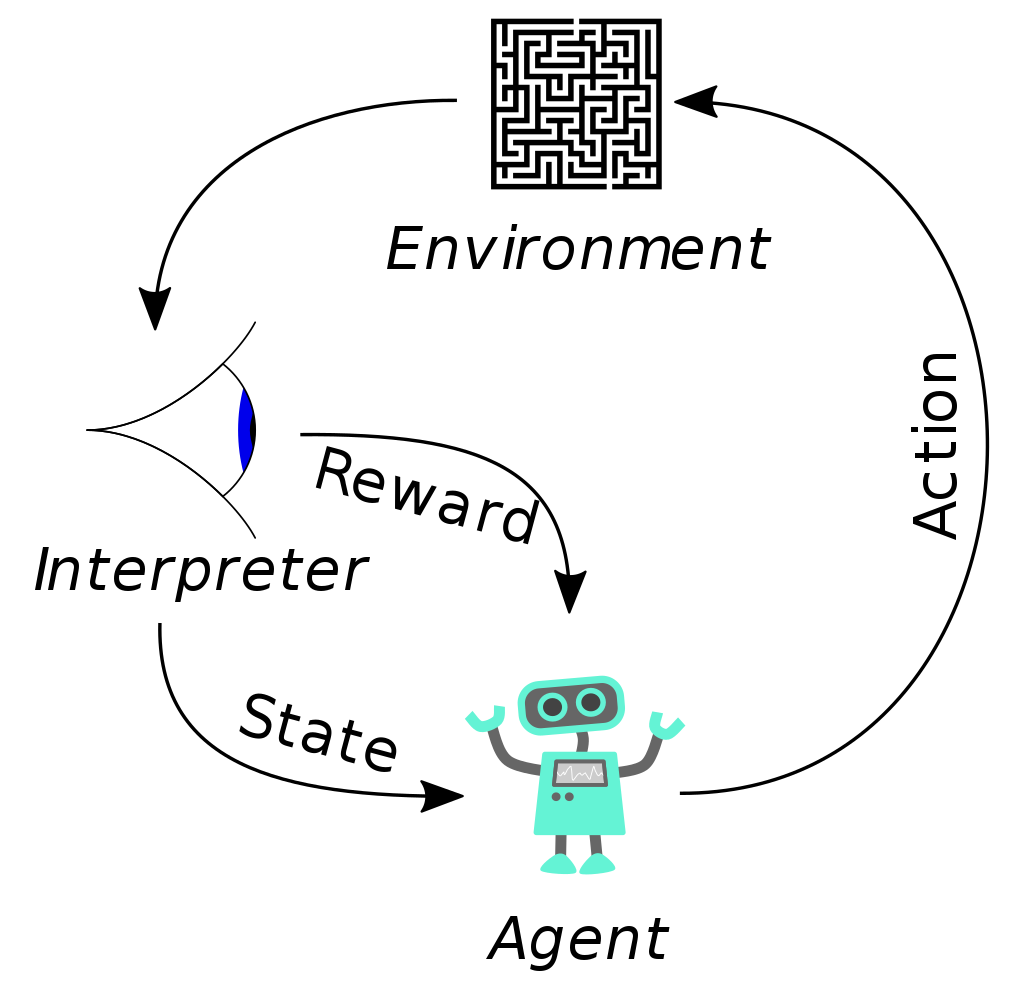

### Basic reinforcement is modeled as a Markov decision process (MDP):

* a software **agent** makes **observations** and takes **actions** within an **environment**, and in return it receives **rewards**
* a set of environment and agent states, S;
* a set of actions, A, of the agent;
* ${\displaystyle P_{a}(s,s')=\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)}$ is the probability of transition (at time ${\displaystyle t}$) from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action ${\displaystyle a}$.

* ${\displaystyle R_{a}(s,s')}$ is the **immediate reward** after transition from ${\displaystyle s}$ to ${\displaystyle s'}$ with action ${\displaystyle a}$.


* The purpose of reinforcement learning is for the agent to **learn an optimal, or nearly-optimal, policy that maximizes the "reward function"** or other user-provided reinforcement signal that accumulates from the immediate rewards.

* **the agent acts in the environment and learns by trial and error to maximize(optimize) rewards**

***Notes***

* Many reinforcement learning algorithms use **dynamic programming** techniques.

* The main difference between the classical dynamic programming methods and reinforcement learning algorithms is that the latter **do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible**.

### Reinforcement Learning examples

a. get positive rewards whenever it approaches the target destination, and negative rewards whenever it wastes time or goes in the wrong direction

b. the environment is a simulation of the Atari game, the actions are the nine possible joystick positions (upper left, down, center, and so on), the observations are screenshots, and the rewards are just the game points.

c. the agent can be the program playing a board game such as Go

d. The agent does not have to control a physically (or virtually) moving thing

e. The agent can observe stock market prices and decide how much to buy or sell every second. Rewards are obviously the monetary gains and losses

And many more such as self-driving cars, recommender systems, placing ads on a web page etc.


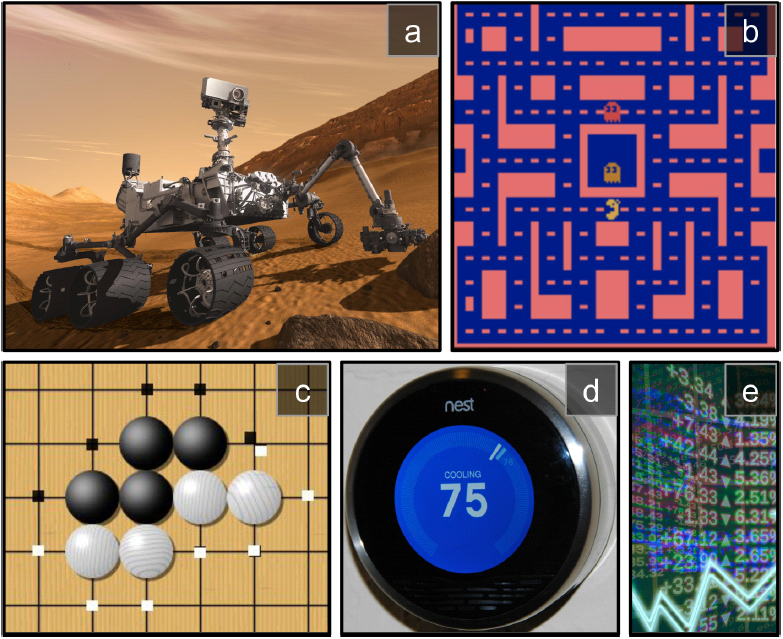

## Policy Search

* The **algorithm** a software agent uses to determine its actions is called its **policy**
* The policy can be **any algorithm**, can be rule-based or ML
* For example, the policy could be a neural network taking observations as inputs and outputting the action to take

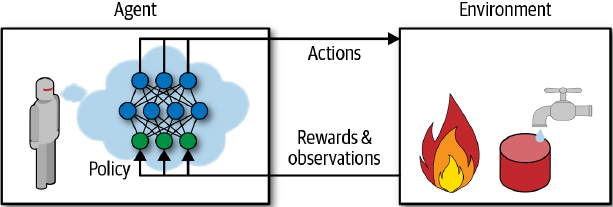

## How to train reinforcement learning model?

* a robotic vacuum cleaner whose **reward is the amount of dust** it picks up in 30 minutes
* Its policy could be to move forward with some probability p every second, or randomly rotate left or right with probability 1 – p.
* The rotation angle would be a random angle between –r and +r.
* stochastic policy
* Train the model: two policy parameters you can tweak: the **probability p** and the **angle range r**.
* Brute force grid search of p and r.
* Like searching needle in haystack
* Or genetic algorithm -- a random search

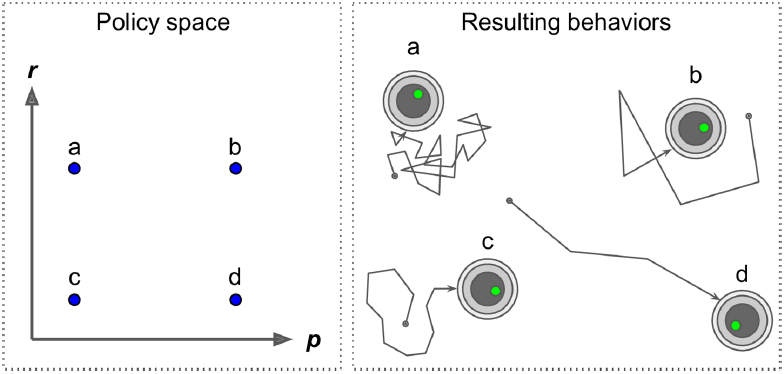

### Any better ideas to train the model?

* The two approaches above are too slow.
* **Policy gradients (PG) by Gradient Ascent**: by evaluating the gradients of the rewards with regard to the policy parameters, then tweaking these parameters by following the gradients toward higher rewards.


# Introduction to OpenAI gym

* you first need to have a working environment to train Reinforcement Learning

* training is hard and slow in the real world, so you generally need a simulated environment 

In this notebook we will be using [OpenAI gym](https://gym.openai.com/), a great toolkit for developing and comparing Reinforcement Learning algorithms. It provides many environments for your learning *agents* to interact with. Let's start by importing `gym`:

In [2]:
import gym

Let's list all the available environments:

In [3]:
gym.envs.registry.all()

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)

The Cart-Pole is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it. The agent must move the cart left or right to keep the pole upright.

In [4]:
env = gym.make('CartPole-v1')

Let's initialize the environment by calling is `reset()` method. This returns an observation:

In [5]:
env.seed(42)
obs = env.reset()

C:\Users\damin\anaconda3\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


Observations vary depending on the environment. In this case it is a 1D NumPy array composed of 4 floats: they represent the cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity.

In [6]:
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

**1D NumPy array composed of 4 floats**

* cart's horizontal position(0.0 = center)
* its velocity(positive means right)
* the angle of the pole (0 = vertical)
* the angular velocity(positive means clockwise).


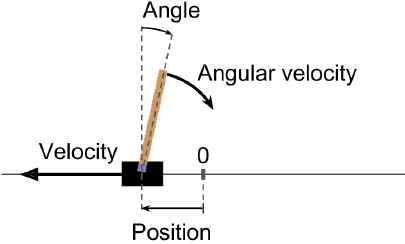

An environment can be visualized by calling its `render()` method, and you can pick the rendering mode (the rendering options depend on the environment).

**Warning**: some environments (including the Cart-Pole) require access to your display, which opens up a separate window, even if you specify `mode="rgb_array"`. In general you can safely ignore that window. However, if Jupyter is running on a headless server (ie. without a screen) it will raise an exception. One way to avoid this is to install a fake X server like [Xvfb](http://en.wikipedia.org/wiki/Xvfb). On Debian or Ubuntu:

```bash
$ apt update
$ apt install -y xvfb
```

You can then start Jupyter using the `xvfb-run` command:

```bash
$ xvfb-run -s "-screen 0 1400x900x24" jupyter notebook
```

Alternatively, you can install the [pyvirtualdisplay](https://github.com/ponty/pyvirtualdisplay) Python library which wraps Xvfb:

```bash
python3 -m pip install -U pyvirtualdisplay
```

And run the following code:

In [7]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [8]:
env.render()

True

In this example we will set `mode="rgb_array"` to get an image of the environment as a NumPy array:

In [9]:
img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

In [10]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

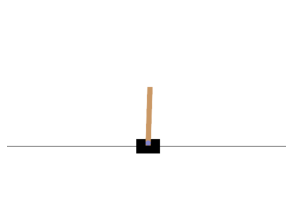

In [11]:
plot_environment(env)
plt.show()

Let's see how to interact with an environment. Your agent will need to select an action from an **"action space" (the set of possible actions)**. Let's see what this environment's action space looks like:

In [14]:
env.action_space

Discrete(2)

**two possible actions: accelerate towards the left or towards the right.**

Since the pole is leaning toward the right (`obs[2] > 0`), let's accelerate the cart toward the right:

In [15]:
action = 1  # accelerate right
obs, reward, done, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Notice that the cart is now moving toward the right (`obs[1] > 0`). The pole is still tilted toward the right (`obs[2] > 0`), but its angular velocity is now negative (`obs[3] < 0`), so it will likely be tilted toward the left after the next step.

### The step() method executes the given action and returns four values:

* obs - This is the new observation. The cart is now moving toward the right (obs[1] > 0). The pole is still tilted toward the right (obs[2] > 0), but its angular velocity is now negative (obs[3] < 0), so it will likely be tilted toward the left after the next step.
* reward - In this environment, you get a **reward of 1.0 at every step**, no matter what you do, so the goal is to keep the episode **running as long as possible**.
* done - This value will be True when the episode is over. This will happen when the pole tilts too much, or goes off the screen, or **after 200 steps (in this last case, you have won)**. After that, the environment must be reset before it can be used again.
* info - This environment-specific dictionary can provide some extra information that you may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

Saving figure cart_pole_plot


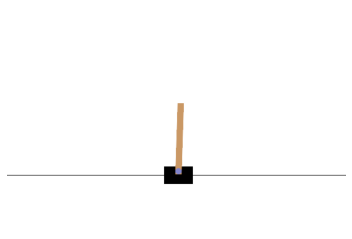

In [16]:
plot_environment(env)
save_fig("cart_pole_plot")

Looks like it's doing what we're telling it to do!

The environment also tells the agent how much reward it got during the last step:

In [15]:
reward

1.0

When the game is over, the environment returns `done=True`:

In [16]:
done

False

Finally, `info` is an environment-specific dictionary that can provide some extra information that you may find useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

In [17]:
info

{}

* The **sequence of steps** between the moment the environment is reset until it is done is called an **"episode"**. 
* At the end of an episode (i.e., when `step()` returns `done=True`), you should reset the environment before you continue to use it.

In [18]:
if done:
    obs = env.reset()

### How can we make the pole remain upright? 

* We will need to define a **_policy_** for that. 
* This is the **strategy that the agent will use to select an action at each step**. 
* It can use all the past actions and observations to decide what to do.

# A simple hard-coded policy

### Let's hard code a simple strategy: 

* Accelerates left when the pole is leaning toward the left
* Accelerates right when the pole is leaning toward the right
* Run 500 episodes to see the average rewards it gets 

In [24]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [25]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.212, 9.032998173364147, 24.0, 72.0)

Well, as expected, this strategy is a bit too basic: the best it did was to keep the poll up for only 72 steps. This environment is considered solved when the agent keeps the pole up for 200 steps.

Let's visualize one episode:

In [26]:
env.seed(42)

frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

Now show the animation:

In [27]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [29]:
plot_animation(frames)

### Now we see the problem

**Clearly the system is unstable and after just a few wobbles, the pole ends up too tilted: game over. We will need to be smarter than that!**

# Neural Network Policies

* Let's create a neural network that will take **observations as inputs**, and **output the probabilities of actions to take for each observation**. 
* To choose an action, the network will **estimate a probability for each action**, then we will **select an action randomly according to the estimated probabilities**. 
* In the case of the Cart-Pole environment, there are just two possible actions (left or right), so we only need one output neuron: it will output the probability `p` of the action 0 (left), and of course the probability of action 1 (right) will be `1 - p`.
* For example, if it outputs 0.7, then we will pick **action 0 with 70% probability**, or **action 1 with 30% probability**.
* This approach lets the agent find the right balance between **exploring new actions and exploiting the actions that are known to work well**.(In general, exploitation will result in choosing actions with a greater short-term reward, whereas exploration can potentially result in greater total rewards in the long run.) 
* You do the same in restaurant!
* **Simplified**: the past actions and observations can safely be ignored, **since each observation contains the environment’s full state**

    * if the environment only revealed the position of the cart but not its velocity, you would have to consider not only the current observation but also the previous observation in order to estimate the current velocity.
    * Another example is when the observations are noisy; in that case, you generally want to use the past few observations to estimate the most likely current state.
    * The CartPole problem is thus as simple as can be; the observations are noise-free, and they contain the environment’s full state.


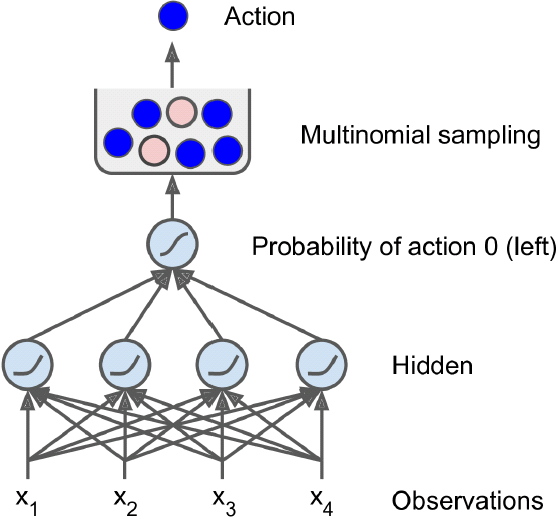

In [30]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

Let's write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [32]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)  # randomly generate the action according to the predicted probability
        obs, reward, done, info = env.step(action) # Take the action
        if done:
            break
    env.close()
    return frames

Now let's look at how well this randomly initialized policy network performs:

In [33]:
frames = render_policy_net(model)
plot_animation(frames)

C:\Users\damin\anaconda3\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


### It runs pretty bad. We haven't trained the NN.

* The neural network will have to learn to do better. 
* **First let's see if it is capable of learning the basic policy we used earlier: go left if the pole is tilting left, and go right if it is tilting right.**

We can make the same net play in 50 different environments in parallel (this will give us a diverse training batch at each step), and train for 5000 iterations. We also reset environments when they are done. We train the model using a custom training loop so we can easily use the predictions at each training step to advance the environments.

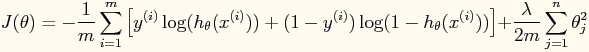

* **If we knew what the best action was at each step**, we could train the neural network as usual, by **minimizing the cross entropy between the estimated probability distribution and the target probability distribution**. 
* It would just be regular supervised learning.


In [34]:
n_environments = 50
n_iterations = 5000

# make the same net play in 50 different environments in parallel
envs = [gym.make("CartPole-v1") for _ in range(n_environments)]
for index, env in enumerate(envs):
    env.seed(index)
np.random.seed(42)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    # Use the last policy  output as training label
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations]) # 50 different environments in parallel ~ 50 groups of observations
    with tf.GradientTape() as tape:
         # Based on the current observations, we predict the probability of the next action
        left_probas = model(np.array(observations))
        # Improve predictions(to make the next predicted value is close to the target value) by minimizing the loss function
        # Use the gradient of the loss function to update the weights so that the next predicted value is close to the target value
        # The optimizer can speed up this process or reduce the steps required in the process

        # - np.log(sigmoid(z))     # if y=1
        # - np.log(1 - sigmoid(z)) # if y=0
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas)) # across 50 different environments
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # select an action randomly for 50 environments seperately         
    # if () return true, then goes to right(1), otherwise, goes to left(0)
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

C:\Users\damin\anaconda3\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


Iteration: 4999, Loss: 0.052

In [35]:
frames = render_policy_net(model)
plot_animation(frames)

### Of course the NN learned it well.

Looks like it learned the policy correctly. 


### The big idea:

Now let's see if it can **learn a better policy on its own**. One that does not wobble as much.

## Evaluating Actions: The Credit Assignment Problem

* In Reinforcement Learning the only guidance the agent gets is through rewards, and rewards are typically sparse and delayed. 
* if the agent manages to balance the pole for 100 steps, how can it know which of the 100 actions it took were good, and which of them were bad? 
* **All it knows is that the pole fell after the last action, but surely this last action is not entirely responsible.**
* **The credit assignment problem**: when the agent gets a reward, it is hard for it to know which actions should get credited (or blamed) for it.
* The basic idea - **Computing an action’s return: the sum of discounted future rewards**

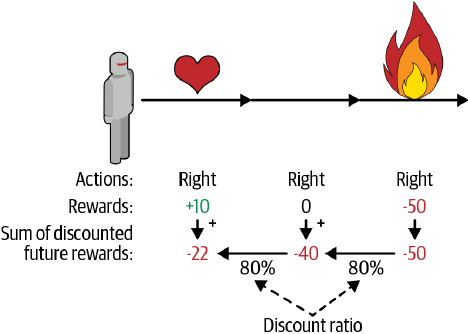

### This is very similar to the bond pricing if you are familar to financial modeling

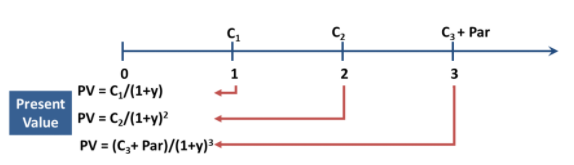

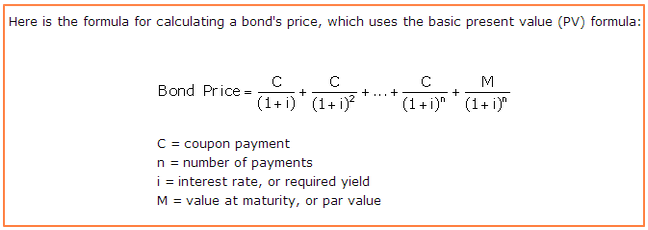

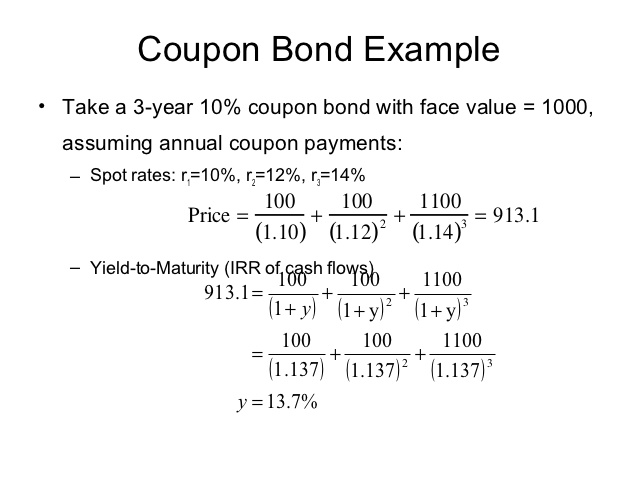

* To evaluate an action based on the sum of all the rewards that come after it
* usually applying a **discount factor 𝛾 (gamma) at each step**. 
* This **sum of discounted rewards** is called the action’s return.

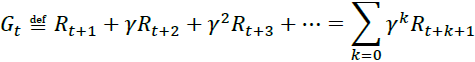

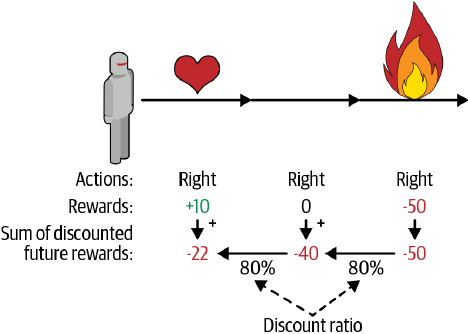

* So in the example above, if an agent decides to go right three times in a row and gets +10 reward after the first step, 0 after the second step, and finally –50 after the third step, then assuming we use a discount factor γ = 0.8, the first action will have a return of



***Notes***

* If the discount factor is close to 0, then future rewards won’t count for much compared to immediate rewards. Conversely,
* if the discount factor is close to 1, then rewards far into the future will count almost as much as immediate rewards.
* **Typical discount factors vary from 0.9 to 0.99**. With a discount factor of 0.95, rewards 13 steps into the future count roughly for half as much as immediate rewards (since 0.95^13 ≈ 0.5), while with a discount factor of 0.99, rewards 69 steps into the future count for half as much as immediate rewards(0.99^69≈0.5).
* In the CartPole environment, actions have fairly short-term effects, so choosing a discount factor of 0.95 seems reasonable.
* if we play the game enough times (we must run many episodes), on average good actions will get a higher return than bad ones
* estimate how much better or worse an action is, **compared to the other possible actions, on average**. This is called the **action advantage**.
* After that, we can reasonably assume that **actions with a negative advantage were bad while actions with a positive advantage were good.**

# Policy Gradients

* To train this neural network we will need to define the target probabilities `y`. 
* If an action is good we should increase its probability, and conversely if it is bad we should reduce it. 
* But how do we know whether an action is good or bad? 
* The problem is that most actions have delayed effects, so when you win or lose points in an episode, it is not clear which actions contributed to this result: was it just the last action? Or the last 10? Or just one action 50 steps earlier? This is the _credit assignment problem_.



* The **_Policy Gradients_** algorithm tackles this problem by **first playing multiple episodes**, 
* then **making the actions in good episodes slightly more likely**, while actions in bad episodes are made slightly less likely. 

First we play, then we go back and think about what we did.

* Let's start by creating a function to play a single step using the model. 
* **We will also pretend for now that whatever action it takes is the right one**, so we can compute the loss and its gradients (we will just save these gradients for now, and **modify them later depending on how good or bad the action turned out to be)**:

In [36]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        
        # we sample a random float between 0 and 1, and we check whether it is greater than left_proba.
        action = (tf.random.uniform([1, 1]) > left_proba) 
        
        # we define the target probability of going left: it is 1 minus the action (cast to a float). 
        # If the action is 0 (left), then the target probability of going left will be 1.
        # If the action is 1 (right), then the target probability will be 0.
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32) #pretend for now that whatever action it takes is the right one
        
        # compute the gradient of the loss with regard to the model’s trainable variables
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
        
    # these gradients will be tweaked later, before we apply them, depending on how good or bad the action turned out to be.
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

If `left_proba` is high, then `action` will most likely be `False` (since a random number uniformally sampled between 0 and 1 will probably not be greater than `left_proba`). And `False` means 0 when you cast it to a number, so `y_target` would be equal to 1 - 0 = 1. **In other words, we set the target to 1, meaning we pretend that the probability of going left should have been 100% (so we took the right action).**

Now let's create another function that will rely on the `play_one_step()` function to play multiple episodes, returning all the rewards and gradients, for each episode and each step:

* one reward list per episode, containing one reward per step
* one gradient list per episode, each
containing one tuple of gradients per step and each tuple containing one gradient
tensor per trainable variable

In [37]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

The Policy Gradients algorithm uses the model to play the episode several times (e.g., 10 times), then it goes back and looks at all the rewards, discounts them and normalizes them. 

* So let's create couple functions for that: 
    * the first will compute discounted rewards; 
    * the second will normalize the discounted rewards across many episodes.

In [39]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Say there were 3 actions, and after each action there was a reward: first 10, then 0, then -50. If we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22:

In [40]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

To normalize all discounted rewards across all episodes, we compute the **mean and standard deviation of all the discounted rewards**, and we subtract the mean from each discounted reward, and divide by the standard deviation:

In [41]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [42]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

In [43]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [45]:
env = gym.make("CartPole-v1")
env.seed(42);

for iteration in range(n_iterations):
    
    # plays the game 10 times and returns all the rewards and gradients for
    # every episode and step.
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    print("\rIteration: {}, mean rewards: {:.1f}".format(          # Not shown
        iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    
    
    # compute each action’s normalized advantage
    # This provides a measure of how good or bad each action actually was, in hindsight.
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    
    # go through each trainable variable, and for each of them we compute
    # the weighted mean of the gradients for that variable over all episodes and all
    # steps, weighted by the final_reward.
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
        
    # apply these mean gradients using the optimizer: the model’s trainable
    # variables will be tweaked, and hopefully the policy will be a bit better
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

C:\Users\damin\anaconda3\lib\site-packages\gym\core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


Iteration: 149, mean rewards: 193.4

In [57]:
frames = render_policy_net(model)
plot_animation(frames)

**The mean reward per episode will get very close to
200 (which is the maximum by default with this environment). Success!**

### How about larger and more complex tasks?

* it needs to **explore the game for a very long time** before it can make significant progress. 
* This is due to the fact that **it must run multiple episodes to estimate the advantage of each action**
* There is another popular family of algorithms...


# Markov Chains

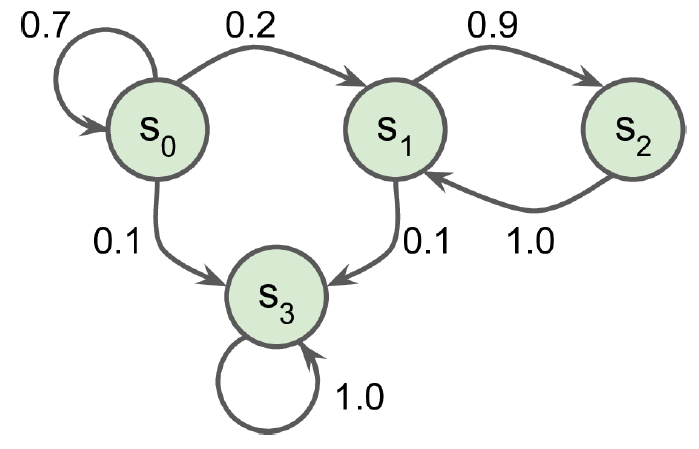

* stochastic processes **with no memory**, called Markov chains. 
* Such a process has a **fixed number of states**, and it randomly evolves from one state to another at each step
* The **probability for it to evolve from a state s to a state s′ is fixed**, and it depends only on the pair (s, s′), not on past states (this is why we say that the system has no memory).


In [46]:
np.random.seed(42)

transition_probabilities = [ # shape=[s, s']
        [0.7, 0.2, 0.0, 0.1],  # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1],  # from s1 to ...
        [0.0, 1.0, 0.0, 0.0],  # from s2 to ...
        [0.0, 0.0, 0.0, 1.0]]  # from s3 to ...

n_max_steps = 50

def print_sequence():
    current_state = 0
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()

for _ in range(10):
    print_sequence()

States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


# Markov Decision Process

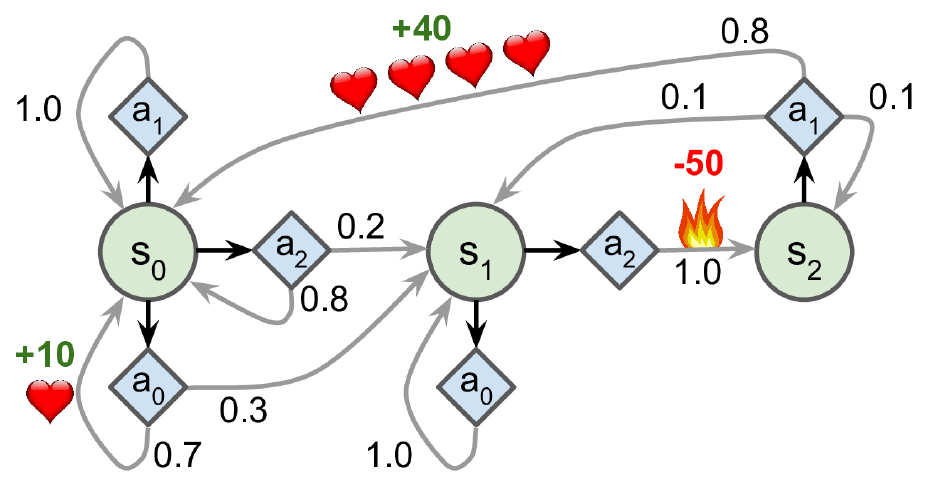

* at each step, an agent can choose one of several possible actions, and the transition probabilities depend on the chosen action.
* some state transitions return some reward (positive or negative)
* the agent’s goal is to find a policy that will maximize reward over time.

* Bellman found a way to estimate the **optimal state value of any state s, noted V*(s)**, which is the sum of all discounted future rewards the agent can expect on average after it reaches a state s


* Bellman Optimality Equation

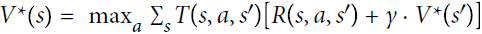

In this equation:

• T(s, a, s′) is the **transition probability from state s to state s′**, given that the agent
chose action a. For example, T(s2, a1, s0) = 0.8.

• R(s, a, s′) is the **reward that the agent gets when it goes from state s to state s′**,
given that the agent chose action a. For example, R(s2, a1,
s0) = +40.

• γ is the **discount factor**.


**if the agent acts optimally, then the optimal value of the
current state is equal to the reward it will get on average after taking one optimal
action, plus the expected optimal value of all possible next states that this action can
lead to.**

### precisely estimate the optimal state value of every possible state

* you first initialize all the state value estimates to
zero, 

* then you iteratively update them using the Value Iteration algorithm

* It is an example of Dynamic Programming, which
breaks down a complex problem into tractable subproblems that
can be tackled iteratively

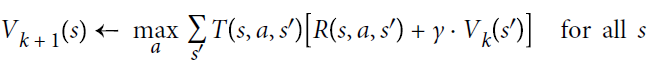

where $V_k(s)$ is the estimated value of state s at the $k^{th}$ iteration of the
algorithm

Let's define some transition probabilities, rewards and possible actions. For example, in state s0, if action a0 is chosen then with proba 0.7 we will go to state s0 with reward +10, with probability 0.3 we will go to state s1 with no reward, and with never go to state s2 (so the transition probabilities are `[0.7, 0.3, 0.0]`, and the rewards are `[+10, 0, 0]`):

In [48]:
transition_probabilities = [# shape=[s, a, s']
                            #  s0 ,  s1,  s2 from s0
                            [ [0.7, 0.3, 0.0], # a0
                              [1.0, 0.0, 0.0], # a1
                              [0.8, 0.2, 0.0]  # a2
                            ],#s0 ,  s1,  s2 from s1
                            [ [0.0, 1.0, 0.0], # a0
                              None,            # a1
                              [0.0, 0.0, 1.0]  # a2
                            ],#s0 ,  s1,  s2 from s2
                            [ None,            # a0
                              [0.8, 0.1, 0.1], # a1
                              None             # a2
                            ]
                           ]
rewards = [ # shape=[s, a, s']
             # s0, s1, s2 from s0
            [ [+10, 0, 0], # a0
              [0, 0, 0],   # a1
              [0, 0, 0]    # a2
            ],#s0,s1,s2 from s1
            [ [0, 0, 0],   # a0
              [0, 0, 0],   # a1
              [0, 0, -50]  # a2
            ],#s0,s1,s2 from s2
            [ [0, 0, 0],   # a0
              [+40, 0, 0], # a1
              [0, 0, 0]    # a2
            ]
          ]
possible_actions = [ [0, 1, 2], # a0,a1,a2 for s0
                     [0, 2],    # a0,a2    for s1
                     [1]        # a1       for s2
                   ]

# Q-Value Iteration

* Knowing the optimal state values can be useful, in particular to evaluate a policy, but it does not give us the optimal policy for the agent.
* Estimate the optimal **state-action values**, generally called **Q-Values
(Quality Values)**
* The optimal Q-Value of the state-action pair (s, a), noted $Q*(s, a)$, is the **sum of discounted future rewards the agent can expect on average after it reaches the state s and chooses action a**, but before it sees the outcome of this
action, assuming it acts optimally after that action

* **Q-Value Iteration algorithm**

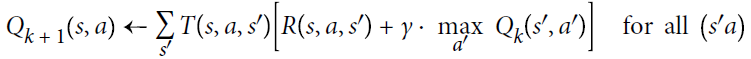

### How to define the optimal policy?

* Once you have the optimal Q-Values, defining the optimal policy, noted π*(s), is trivial
* when the agent is in state s, it should choose the action with the highest Q-Value
for that state: 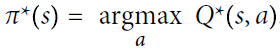

In [49]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [50]:
gamma = 0.90  # the discount factor

history1 = [] # Not shown in the book (for the figure below)
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev) # Not shown
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1) # Not shown

In [51]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

* For example, when the agent is in state s0 and it chooses action a1, the expected sum
of discounted future rewards is approximately 17.0.

* For each state, choose the action that has the highest Q-Value:

In [44]:
np.argmax(Q_values, axis=1)

array([0, 0, 1])

The optimal policy for this MDP, when using a discount factor of 0.90, is to choose action a0 when in state s0, and choose action a0 when in state s1, and finally choose action a1 (the only possible action) when in state s2.

Let's try again with a discount factor of 0.95:

In [45]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [46]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [47]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [48]:
np.argmax(Q_values, axis=1)

array([0, 2, 1])

***Notes***

* Now the policy has changed! In state s1, we now prefer to go through the fire (choose action a2). 
* This is because the discount factor is larger so the agent values the future more, and it is therefore ready to pay an immediate penalty in order to get more future rewards.

# Q-Learning

* Q-Learning algorithm is an adaptation of the Q-Value Iteration algorithm
to the situation where the transition probabilities and the rewards are initially
unknown

* Q-Learning works by watching an agent play (e.g.,
randomly) and gradually improving its estimates of the Q-Values.

* Once it has accurate Q-Value estimates (or close enough), then the optimal policy is choosing the
action that has the highest Q-Value (i.e., the greedy policy).

**Q-Learning algorithm**

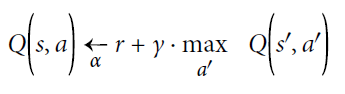

* For each state-action pair (s, a), this algorithm keeps track of a running average of the rewards r the agent gets upon leaving the state s with action a
* plus the sum of discounted future rewards it expects to get.
* To estimate this sum, we take the maximum
of the Q-Value estimates for the next state s′, since we assume that the target policy
would act optimally from then on.

Q-Learning works by watching an agent play (e.g., randomly) and gradually improving its estimates of the Q-Values. Once it has accurate Q-Value estimates (or close enough), then the optimal policy consists in choosing the action that has the highest Q-Value (i.e., the greedy policy).

We will need to simulate an agent moving around in the environment, so let's define a function to perform some action and get the new state and a reward:

In [52]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

We also need an exploration policy, which can be any policy, as long as it visits every possible state many times. We will just use a random policy, since the state space is very small:

In [53]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

Now let's initialize the Q-Values like earlier, and run the Q-Learning algorithm:

In [54]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] # Not shown in the book

for iteration in range(10000):
    history2.append(Q_values.copy()) # Not shown
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2) # Not shown

In [55]:
Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [56]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1], dtype=int64)

Saving figure q_value_plot


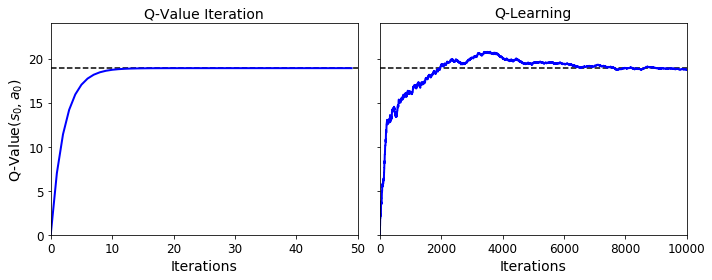

In [54]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

save_fig("q_value_plot")

# Deep Q-Network

* The main problem with Q-Learning is that it does not scale well to large (or even
medium) MDPs with **many states and actions**. Think about Go and Pac-man.

* there’s absolutely no way you can keep track of an estimate for every single
Q-Value.

### The idea

* **Approximate Q-Learning**: The solution is to find a function $Q_θ(s, a)$ that approximates the Q-Value of any state action
pair (s, a) using a manageable number of parameters.
* A DNN used to estimate Q-Values is called a **Deep Q-Network (DQN)**
* Using a
DQN for Approximate Q-Learning is called **Deep Q-Learning**


* Target Q-Value

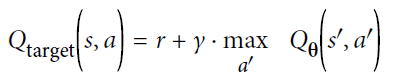

Let's build the **DQN**. Given a state, it will estimate, for each possible action, the sum of discounted future rewards it can expect after it plays that action (but before it sees its outcome):

In [55]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

To select an action using this DQN, we just pick the action with the largest predicted Q-value. However, to ensure that the agent explores the environment, we choose a random action with probability `epsilon`.

In [56]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

We will also need a replay memory. It will contain the agent's experiences, in the form of tuples: `(obs, action, reward, next_obs, done)`. We can use the `deque` class for that (but make sure to check out DeepMind's excellent [Reverb library](https://github.com/deepmind/reverb) for a much more robust implementation of experience replay):

* sample a random training batch from it at each training iteration. 
* This helps reduce the correlations
between the experiences in a training batch

In [57]:
from collections import deque

replay_memory = deque(maxlen=2000)

And let's create a function to sample experiences from the replay memory. It will return 5 NumPy arrays: `[obs, actions, rewards, next_obs, dones]`.

In [58]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

Now we can create a function that will use the DQN to play one step, and record its experience in the replay memory:

In [59]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

Lastly, let's create a function that will sample some experiences from the replay memory and perform a training step:



In [60]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    # sampling a batch of experiences
    experiences = sample_experiences(batch_size) 
    states, actions, rewards, next_states, dones = experiences
    
    # it uses the DQN to predict the Q-Value for each possible action in each experience’s next state
    next_Q_values = model.predict(next_states) 
    
    # Since we assume that the agent will be playing optimally, we only keep the maximum Q-Value for each next state
    max_next_Q_values = np.max(next_Q_values, axis=1)
    
    # compute the target Q-Value for each experience’s state-action pair
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs) #mask out all the Q-Values we do not need
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        
        # mean squared error between the target and predicted Q-Values for the experienced state-action pairs
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
        
    # perform a Gradient Descent step to minimize the loss with regard to the model’s trainable variables.
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

And now, let's train the model!

In [61]:
env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = [] 
best_score = 0

In [62]:
for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) # Not shown in the book
    if step >= best_score: # Not shown
        best_weights = model.get_weights() # Not shown
        best_score = step # Not shown
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") # Not shown
    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

Episode: 599, Steps: 200, eps: 0.010

Saving figure dqn_rewards_plot


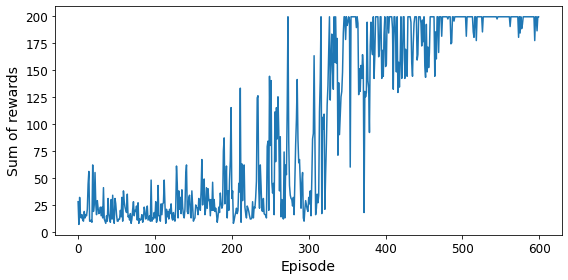

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [64]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)